In [1]:
pip install APIKey

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#grab apikey

In [4]:
from googleapiclient.discovery import build
from youtube_authentication import api_key

In [134]:
channel_id = ['UCAkRwnMBtC7aKeIaC979ZWw']

youtube = build('youtube', 'v3', developerKey=api_key)

# Function to get channel stats
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=channel_id
    )
    response = request.execute()

    return response

# Call the function and capture the response
response = get_channel_stats(youtube, channel_id)

# Print the response
print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'YFFmZsQ1djRX8WwvGsDY8avnocM', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'UKfrdfrzoME0O06rqPQfHeU8e6Q', 'id': 'UCAkRwnMBtC7aKeIaC979ZWw', 'snippet': {'title': '有声小说', 'description': '欢迎关注订阅我的频道！在这里，我将分享喜欢的有声小说、有声读物，玄幻武侠、都市言情应有尽有，更多优质有声小说正在更新中！', 'customUrl': '@user-gn4hw7dh7t', 'publishedAt': '2020-07-03T03:33:23.730631Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AGIKgqNAl4YluaAbBkY3pxTdLUho7WRgM-xW_DZoX0iX=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://yt3.ggpht.com/ytc/AGIKgqNAl4YluaAbBkY3pxTdLUho7WRgM-xW_DZoX0iX=s240-c-k-c0x00ffffff-no-rj', 'width': 240, 'height': 240}, 'high': {'url': 'https://yt3.ggpht.com/ytc/AGIKgqNAl4YluaAbBkY3pxTdLUho7WRgM-xW_DZoX0iX=s800-c-k-c0x00ffffff-no-rj', 'width': 800, 'height': 800}}, 'localized': {'title': '有声小说', 'description': '欢迎关注订阅我的频道！在这里，我将分享喜欢的有声小说、有声读物，玄幻武侠、都市言情应有尽有，更多优质有声小说正在更新中！'},

In [102]:
#my channel has a total of 1094 videos, 2,915,466 view counts and 4060 subscribers 

In [135]:
channel_id = ['UCAkRwnMBtC7aKeIaC979ZWw']

youtube = build('youtube', 'v3', developerKey=api_key)

# Function to get channel stats
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=channel_id
    )
    response = request.execute()

    data = dict(Channel_name = response['items'][0]['snippet']['title'],
                Subscribers = response['items'][0]['statistics']['subscriberCount'],
                Views = response['items'][0]['statistics']['viewCount'],
                Total_videos = response['items'][0]['statistics']['videoCount'],
                playlist_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads'])
    
    return data

In [136]:
channel_data = get_channel_stats(youtube, channel_id)

In [137]:
channel_data

{'Channel_name': '有声小说',
 'Subscribers': '4070',
 'Views': '2915466',
 'Total_videos': '1094',
 'playlist_id': 'UUAkRwnMBtC7aKeIaC979ZWw'}

In [138]:
playlist_id = channel_data['playlist_id']

In [139]:
playlist_id

'UUAkRwnMBtC7aKeIaC979ZWw'

In [140]:
# function to get video ids 

def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50
    )

    response = request.execute()
    video_ids = []

    for video in range(len(response['items'])):
        if 'videoId' in response['items'][video]['contentDetails']:
            video_ids.append(response['items'][video]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page_token
            )
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_ids

In [141]:
print(video_ids)

['VwacVt92lPY', 'whF80X0a-BU', 'tU6xp2Gz5ps', 'QdaeztYjkl4', 'QulZWHDQxM4', 'O1J4YPpRkIE', 'Cz4nIkZ3zvM', '5-HOqKZi-B8', 'kZyiex4Qplk', '8vCeTcQL2Ps', 'eniyFPAkcJo', 'DA-ZoqFd_Ro', 'HGk4GWhAymI', 'SGIs7nKXvRY', '8OGs4b9XdQs', '6YTW0BeGxzo', '3qdOx80tkkk', 'QZfZhNU6y6s', '7Sgoztj1TP4', 'HIUxUM75E1Q', 'GEelqenwHpk', 'qlmZq-Tst3Y', 'r5P3UgGj9pA', 'kZYIG0kyroI', 'YZkNUKDUfhE', 'N5VNzMHtpwQ', '0NI_AibH-O4', '1oggDgJF3kc', 'hu7VQwgoN1w', 'rKgtXugrZYg', 'koVRsUshU7s', '4MMhrbQBqpw', 'CCk3eJYZc00', 'rHx5RhbtRSw', 'eZ41oI8iKvM', 'KbKJlk6oRco', 'PzJEIqUlPMA', 'PqzpaMJh0Hg', 'ULx7iiiiFWc', 'zaQIJTVdWUI', 'BDBQkDaH1lw', 'Saz7qa7hItE', 'wocYwrZkZJw', '5R1i08TUmOs', '2JUSNvqQ59g', 'FUBkR2OPyHU', 'o_5BXCSfMxA', 'ajK88WUXSpg', 'LAfLTCfh0yo', 'DBiY5kf_XKw', '5VFjWonsva8', 'mKx-o1Wqack', '378kOoUg62k', '9JGqmmt5qkI', 'WEP_rNus5uw', '1eC7Yqz_9lA', 'ndwYC5yNL7s', 'r8EKqdUQ_js', 'jHSMnMrBL-Q', 'LbbyxQ-jJHY', 'WVfmzDgQwwQ', 'Xhn2U3WO1kU', '38TWxCUpMzU', 'XbJbGTz6hZk', 'CDN-T28016k', 'H9OZPCp9XH4', 'JuhtKOoA

In [142]:
video_ids = get_video_ids(youtube, playlist_id)

In [143]:
playlist_id

'UUAkRwnMBtC7aKeIaC979ZWw'

In [144]:
import json
with open("My_videos.json", 'w') as output_file:
    data_string = json.dumps(video_ids) 
    print(data_string, file=output_file)

In [145]:
len(video_ids)

1094

In [155]:
#youtube does not allow for more than 50 video while I have 1094 videos

In [176]:
def get_video_details(youtube, video_ids):
    all_video_stats = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(str(id) for id in video_ids[i:i+50]))
        response = request.execute()

        for video in response['items']:
            video_stats = dict(Title=video['snippet']['title'],
                                Published_date=video['snippet']['publishedAt'],
                                Views=video['statistics']['viewCount'],
                                Likes=video['statistics']['likeCount'],
                                Comments=video['statistics']['commentCount'])
            
            all_video_stats.append(video_stats)

    return all_video_stats

In [177]:
get_video_details(youtube, video_ids)

[{'Title': '想入非非 有声小说 第57集 完',
  'Published_date': '2020-12-31T05:00:18Z',
  'Views': '1715',
  'Likes': '8',
  'Comments': '0'},
 {'Title': '想入非非 有声小说 第55集',
  'Published_date': '2020-12-31T00:00:09Z',
  'Views': '745',
  'Likes': '6',
  'Comments': '0'},
 {'Title': '想入非非 有声小说 第56集',
  'Published_date': '2020-12-30T03:03:06Z',
  'Views': '650',
  'Likes': '3',
  'Comments': '0'},
 {'Title': '想入非非 有声小说 第54集',
  'Published_date': '2020-12-30T03:01:41Z',
  'Views': '708',
  'Likes': '3',
  'Comments': '0'},
 {'Title': '想入非非 有声小说 第53集',
  'Published_date': '2020-12-30T02:57:27Z',
  'Views': '542',
  'Likes': '4',
  'Comments': '0'},
 {'Title': '想入非非 有声小说 第52集',
  'Published_date': '2020-11-12T20:16:51Z',
  'Views': '871',
  'Likes': '3',
  'Comments': '2'},
 {'Title': '《偷偷藏不住》第119集 完 有声小说',
  'Published_date': '2020-11-12T05:00:01Z',
  'Views': '54594',
  'Likes': '468',
  'Comments': '22'},
 {'Title': '《偷偷藏不住》第118集 有声小说',
  'Published_date': '2020-11-11T23:00:00Z',
  'Views': '19377',
  

In [178]:
video_details = get_video_details(youtube, video_ids)

In [179]:
video_data = pd.DataFrame(video_details)

In [180]:
video_data

,Title,Published_date,Views,Likes,Comments
0,想入非非 有声小说 第57集 完,2020-12-31T05:00:18Z,1715,8,0
1,想入非非 有声小说 第55集,2020-12-31T00:00:09Z,745,6,0
2,想入非非 有声小说 第56集,2020-12-30T03:03:06Z,650,3,0
3,想入非非 有声小说 第54集,2020-12-30T03:01:41Z,708,3,0
4,想入非非 有声小说 第53集,2020-12-30T02:57:27Z,542,4,0
...,...,...,...,...,...
1089,最好的我们05 最好莫过陌生人,2020-07-19T21:35:38Z,1668,3,0
1090,最好的我们04 喂，所以我们坐同桌吧,2020-07-19T21:27:30Z,333,3,0
1091,最好的我们02 耿耿余淮,2020-07-03T04:18:52Z,655,4,0
1092,最好的我们01 耿耿,2020-07-03T04:15:52Z,3767,17,0


In [183]:
#convert data - publish date,views, likes, comments

video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])

video_data

,Title,Published_date,Views,Likes,Comments
0,想入非非 有声小说 第57集 完,2020-12-31,1715,8,0
1,想入非非 有声小说 第55集,2020-12-31,745,6,0
2,想入非非 有声小说 第56集,2020-12-30,650,3,0
3,想入非非 有声小说 第54集,2020-12-30,708,3,0
4,想入非非 有声小说 第53集,2020-12-30,542,4,0
...,...,...,...,...,...
1089,最好的我们05 最好莫过陌生人,2020-07-19,1668,3,0
1090,最好的我们04 喂，所以我们坐同桌吧,2020-07-19,333,3,0
1091,最好的我们02 耿耿余淮,2020-07-03,655,4,0
1092,最好的我们01 耿耿,2020-07-03,3767,17,0


In [184]:
video_data.to_csv("video_data.tsv", sep="\t", index=False)

In [212]:
# Calculate the average views per video
average_views = video_data['Views'].mean()
average_views

2666.7586837294334

# Analysis on top 10 videos

In [132]:
#get the top 10 viewed videos 

top10_views = video_data.sort_values(by = 'Views',ascending = False).head(10)
top10_views

,Title,Published_date,Views,Likes,Comments,book
776,《偷偷藏不住》第 01 集 有声小说,2020-08-17,68697,68697,68697,偷偷藏不住
6,《偷偷藏不住》第119集 完 有声小说,2020-11-12,54592,54592,54592,偷偷藏不住
31,《偷偷藏不住》第108集 有声小说,2020-11-03,45156,45156,45156,偷偷藏不住
33,《偷偷藏不住》第107集 有声小说,2020-11-02,33357,33357,33357,偷偷藏不住
29,《偷偷藏不住》第109集 有声小说,2020-11-03,28436,28436,28436,偷偷藏不住
129,《偷偷藏不住》第70集 有声小说,2020-10-09,24486,24486,24486,偷偷藏不住
20,《偷偷藏不住》第110集 有声小说,2020-11-09,24310,24310,24310,偷偷藏不住
35,《偷偷藏不住》第106集 有声小说,2020-11-01,23667,23667,23667,偷偷藏不住
999,《你是我的荣耀》有声小说 第 01 集,2020-08-08,23500,23500,23500,你是我的荣耀
7,《偷偷藏不住》第118集 有声小说,2020-11-11,19377,19377,19377,偷偷藏不住


C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20599 (\N{CJK UNIFIED IDEOGRAPH-5077}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 34255 (\N{CJK UNIFIED IDEOGRAPH-85CF}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12299 (\N{RIGHT D

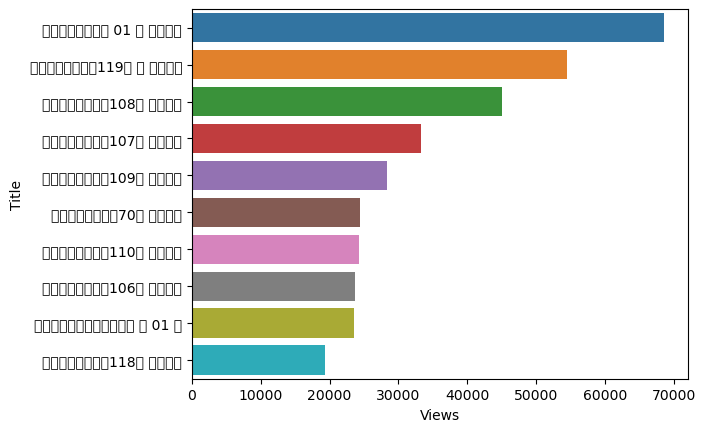

In [35]:
ax1a = sns.barplot(x = 'Views',y='Title',data = top10_views) 
#the language does not allow to show it 

In [121]:
top10_views.to_csv("top10_views.tsv", sep="\t", index=False)

In [186]:
#get the top 10 commented videos 

top10_comments = video_data.sort_values(by = 'Comments',ascending = False).head(10)
top10_comments

,Title,Published_date,Views,Likes,Comments
6,《偷偷藏不住》第119集 完 有声小说,2020-11-12,54594,468,22
1085,sleep music with rain | liziqi background musi...,2020-08-02,11331,171,17
776,《偷偷藏不住》第 01 集 有声小说,2020-08-17,68697,328,16
31,《偷偷藏不住》第108集 有声小说,2020-11-03,45158,242,12
983,锦衣之下 有声小说 第 01 集,2020-08-08,13918,75,7
1086,sleep music with rain | liziqi bgm 李子柒 | one-h...,2020-07-31,17211,271,7
103,《偷偷藏不住》第76集 有声小说,2020-10-13,13165,101,6
830,sleep music with rain | liziqi background musi...,2020-08-15,8306,127,5
129,《偷偷藏不住》第70集 有声小说,2020-10-09,24486,199,5
999,《你是我的荣耀》有声小说 第 01 集,2020-08-08,23501,84,5


C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20599 (\N{CJK UNIFIED IDEOGRAPH-5077}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 34255 (\N{CJK UNIFIED IDEOGRAPH-85CF}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12299 (\N{RIGHT D

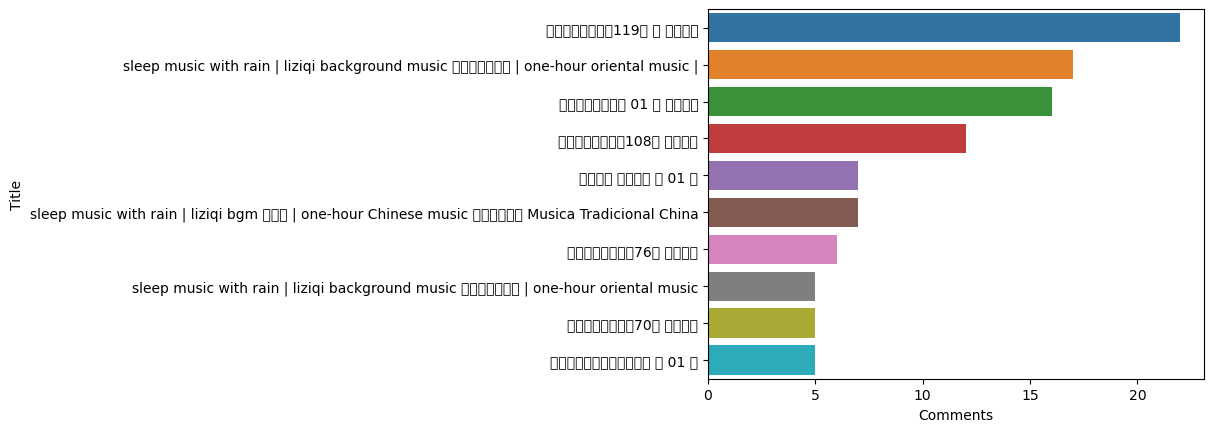

In [189]:
ax1b = sns.barplot(x = 'Comments',y='Title',data = top10_comments) 

In [191]:
top10_comments.to_csv("top10_comments.tsv", sep="\t", index=False)

In [188]:
#get the top 10 liked videos 

top10_likes = video_data.sort_values(by = 'Likes',ascending = False).head(10)
top10_likes

,Title,Published_date,Views,Likes,Comments
6,《偷偷藏不住》第119集 完 有声小说,2020-11-12,54594,468,22
776,《偷偷藏不住》第 01 集 有声小说,2020-08-17,68697,328,16
1086,sleep music with rain | liziqi bgm 李子柒 | one-h...,2020-07-31,17211,271,7
31,《偷偷藏不住》第108集 有声小说,2020-11-03,45158,242,12
129,《偷偷藏不住》第70集 有声小说,2020-10-09,24486,199,5
33,《偷偷藏不住》第107集 有声小说,2020-11-02,33358,186,5
1085,sleep music with rain | liziqi background musi...,2020-08-02,11331,171,17
35,《偷偷藏不住》第106集 有声小说,2020-11-01,23668,137,0
29,《偷偷藏不住》第109集 有声小说,2020-11-03,28436,134,4
20,《偷偷藏不住》第110集 有声小说,2020-11-09,24310,127,1


C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20599 (\N{CJK UNIFIED IDEOGRAPH-5077}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 34255 (\N{CJK UNIFIED IDEOGRAPH-85CF}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12299 (\N{RIGHT D

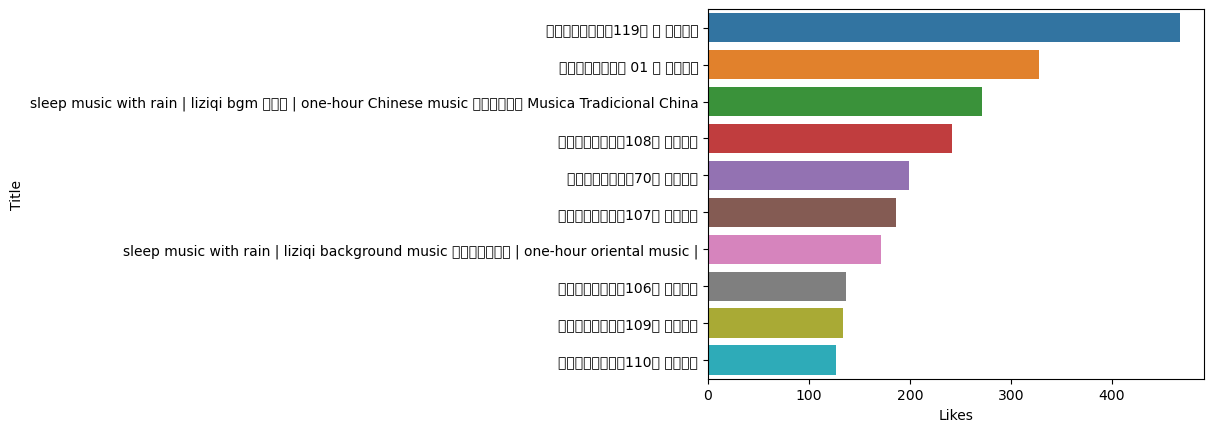

In [190]:
ax1c = sns.barplot(x = 'Likes',y='Title',data = top10_likes) 

In [192]:
top10_likes.to_csv("top10_likes.tsv", sep="\t", index=False)

In [199]:
#get the top 10 liked videos 

top10_likes = video_data.sort_values(by = 'Likes',ascending = False).head(100)
top10_likes

,Title,Published_date,Views,Likes,Comments
6,《偷偷藏不住》第119集 完 有声小说,2020-11-12,54594,468,22
776,《偷偷藏不住》第 01 集 有声小说,2020-08-17,68697,328,16
1086,sleep music with rain | liziqi bgm 李子柒 | one-h...,2020-07-31,17211,271,7
31,《偷偷藏不住》第108集 有声小说,2020-11-03,45158,242,12
129,《偷偷藏不住》第70集 有声小说,2020-10-09,24486,199,5
...,...,...,...,...,...
39,《偷偷藏不住》第103集 有声小说,2020-10-31,13836,57,0
45,《偷偷藏不住》第98集 有声小说,2020-10-29,11829,57,0
722,《偷偷藏不住》第 23 集 有声小说,2020-08-19,7219,56,4
716,《偷偷藏不住》第 29 集 有声小说,2020-08-19,7603,56,0


# Analysis on publish date - videos uploaded per month / day

In [38]:
#create a new column for month

video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,想入非非 有声小说 第57集 完,2020-12-31,1715,1715,1715,Dec
1,想入非非 有声小说 第55集,2020-12-31,745,745,745,Dec
2,想入非非 有声小说 第56集,2020-12-30,650,650,650,Dec
3,想入非非 有声小说 第54集,2020-12-30,708,708,708,Dec
4,想入非非 有声小说 第53集,2020-12-30,542,542,542,Dec
...,...,...,...,...,...,...
1089,最好的我们05 最好莫过陌生人,2020-07-19,1668,1668,1668,Jul
1090,最好的我们04 喂，所以我们坐同桌吧,2020-07-19,333,333,333,Jul
1091,最好的我们02 耿耿余淮,2020-07-03,654,654,654,Jul
1092,最好的我们01 耿耿,2020-07-03,3767,3767,3767,Jul


In [40]:
video_per_month = video_data.groupby('Month',as_index = False).size()
video_per_month

,Month,size
0,Aug,670
1,Dec,5
2,Jul,8
3,Nov,32
4,Oct,148
5,Sep,231


In [50]:
#analysis how many videos are published per month

sort_order = ['Jul','Aug','Sep','Oct','Nov','Dec']
video_per_month.index = pd.CategoricalIndex(video_per_month['Month'],
                                            categories = sort_order,ordered = True)

video_per_month = video_per_month.sort_index()
video_per_month

,Month,size
Month,,
Jul,Jul,8
Aug,Aug,670
Sep,Sep,231
Oct,Oct,148
Nov,Nov,32
Dec,Dec,5


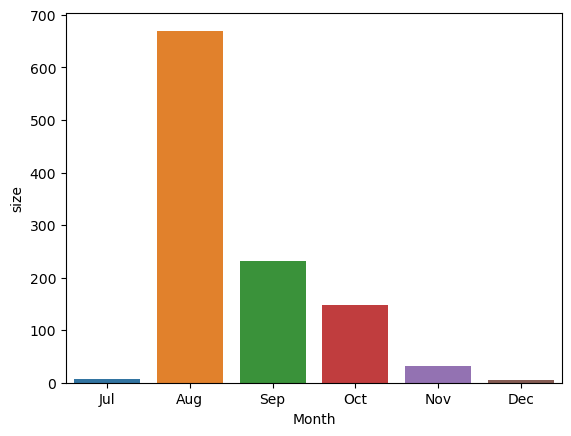

In [51]:
ax2 = sns.barplot(x = 'Month',y = 'size',data = video_per_month)

In [77]:
#analysis how many videos are published per day

video_data['Day'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%Y-%m-%d')
video_per_day = video_data.groupby('Day', as_index=False).size()
video_per_day

,Day,size
0,2020-07-03,3
1,2020-07-19,2
2,2020-07-28,1
3,2020-07-30,1
4,2020-07-31,1
...,...,...
97,2020-11-10,5
98,2020-11-11,5
99,2020-11-12,2
100,2020-12-30,3


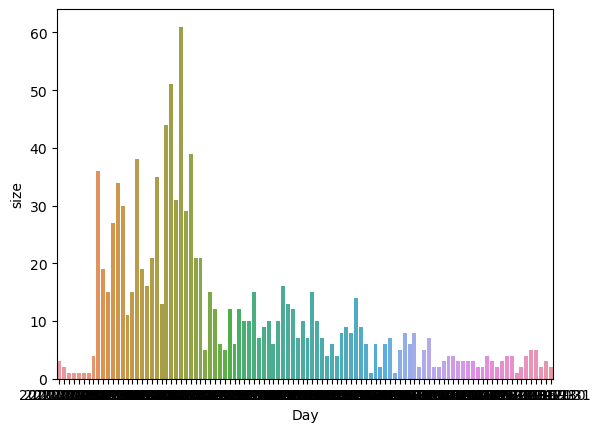

In [78]:
ax3 = sns.barplot(x = 'Day',y = 'size',data = video_per_day)

In [79]:
video_per_day.to_csv("video_per_day.tsv", sep="\t", index=False)

# Analysis on different books

In [200]:
# Create a new column for book titles

# Define a list of categories
categories = [
    '你是我的荣耀',
    '偷偷藏不住',
    '锦衣之下'
]

# Function to categorize a title based on categories
def categorize_title(title):
    for category in categories:
        if category in title:
            return category
    return 'other'  # Default category if no category matches

# Create the 'book' column based on title categorization
video_data['book'] = video_data['Title'].apply(categorize_title)

# Display the updated DataFrame
video_data


,Title,Published_date,Views,Likes,Comments,book
0,想入非非 有声小说 第57集 完,2020-12-31,1715,8,0,想入非非
1,想入非非 有声小说 第55集,2020-12-31,745,6,0,想入非非
2,想入非非 有声小说 第56集,2020-12-30,650,3,0,想入非非
3,想入非非 有声小说 第54集,2020-12-30,708,3,0,想入非非
4,想入非非 有声小说 第53集,2020-12-30,542,4,0,想入非非
...,...,...,...,...,...,...
1089,最好的我们05 最好莫过陌生人,2020-07-19,1668,3,0,other
1090,最好的我们04 喂，所以我们坐同桌吧,2020-07-19,333,3,0,other
1091,最好的我们02 耿耿余淮,2020-07-03,655,4,0,other
1092,最好的我们01 耿耿,2020-07-03,3767,17,0,other


In [123]:
#I hope to see if there is a pattern of video views among each book so I decided to pick couple books 
#'你是我的荣耀'
#'偷偷藏不住'
#'锦衣之下'

In [222]:
Video_playlist你是我的荣耀 = video_data[video_data["Title"].str.contains('你是我的荣耀')]

#get the top videos for Video_playlist你是我的荣耀

Video_playlist你是我的荣耀_byviews = Video_playlist你是我的荣耀.sort_values(by = 'Title',ascending = True)
Video_playlist你是我的荣耀_byviews

,Title,Published_date,Views,Likes,Comments,book
72,《你是我的荣耀》有声小说 番外第10集,2020-10-20,4693,10,0,你是我的荣耀
70,《你是我的荣耀》有声小说 番外第11集,2020-10-21,3815,6,0,你是我的荣耀
69,《你是我的荣耀》有声小说 番外第12集,2020-10-21,3690,8,0,你是我的荣耀
68,《你是我的荣耀》有声小说 番外第13集,2020-10-21,3496,8,0,你是我的荣耀
66,《你是我的荣耀》有声小说 番外第14集,2020-10-22,3418,3,1,你是我的荣耀
65,《你是我的荣耀》有声小说 番外第15集,2020-10-22,3545,11,0,你是我的荣耀
63,《你是我的荣耀》有声小说 番外第16集,2020-10-23,3367,6,0,你是我的荣耀
60,《你是我的荣耀》有声小说 番外第17集完,2020-10-23,3411,7,2,你是我的荣耀
87,《你是我的荣耀》有声小说 番外第1集,2020-10-16,7929,25,0,你是我的荣耀
86,《你是我的荣耀》有声小说 番外第2集,2020-10-17,5179,17,0,你是我的荣耀


C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20320 (\N{CJK UNIFIED IDEOGRAPH-4F60}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 33635 (\N{CJK UNI

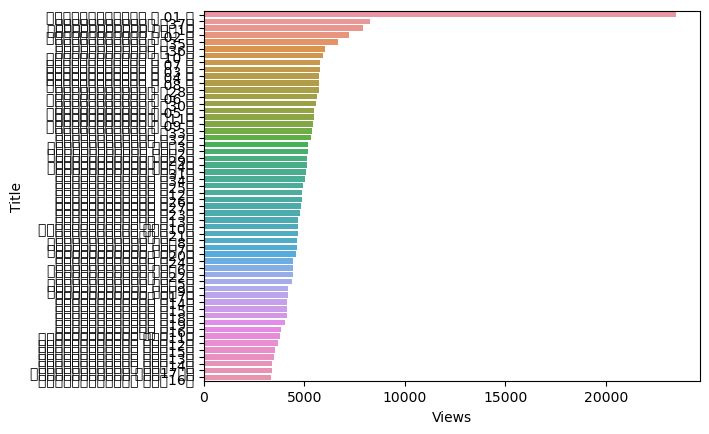

In [203]:
你是我的荣耀 = sns.barplot(x = 'Views',y='Title',data = Video_playlist你是我的荣耀_byviews) 

In [223]:
Video_playlist你是我的荣耀_byviews.to_csv("Video_playlist你是我的荣耀.tsv", sep="\t", index=False)

C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20599 (\N{CJK UNIFIED IDEOGRAPH-5077}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 34255 (\N{CJK UNIFIED IDEOGRAPH-85CF}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12299 (\N{RIGHT D

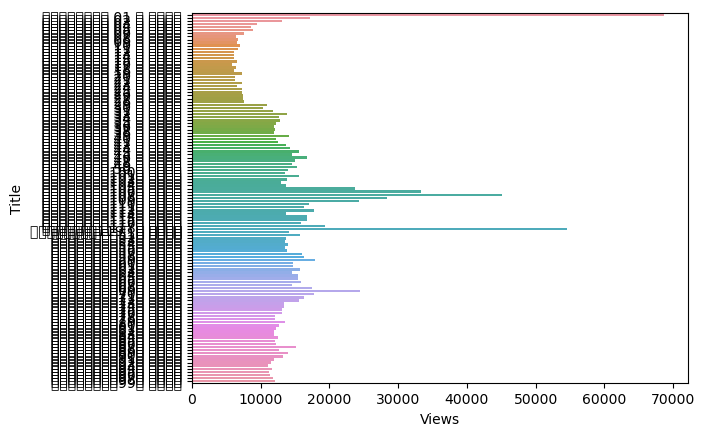

In [220]:
Video_playlist偷偷藏不住 = video_data[video_data["Title"].str.contains('偷偷藏不住')]

#get the top videos for Video_playlist偷偷藏不住

Video_playlist偷偷藏不住_byviews = Video_playlist偷偷藏不住.sort_values(by = 'Title',ascending = True)
Video_playlist偷偷藏不住_byviews

偷偷藏不住 = sns.barplot(x = 'Views',y='Title',data = Video_playlist偷偷藏不住_byviews) 

In [221]:
Video_playlist偷偷藏不住_byviews.to_csv("Video_playlist偷偷藏不住.tsv", sep="\t", index=False)

C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38182 (\N{CJK UNIFIED IDEOGRAPH-9526}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 34915 (\N{CJK UNIFIED IDEOGRAPH-8863}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  func(*args, **kwargs)
C:\Users\hujin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22768 (\N{CJK UN

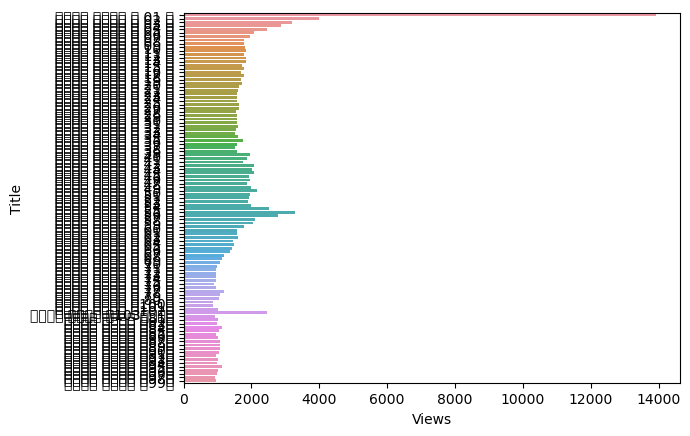

In [219]:
Video_playlist锦衣之下 = video_data[video_data["Title"].str.contains('锦衣之下')]

#get the top videos for Video_playlist锦衣之下
Video_playlist锦衣之下_byviews = Video_playlist锦衣之下.sort_values(by = 'Title',ascending = True)
Video_playlist锦衣之下_byviews

锦衣之下 = sns.barplot(x = 'Views',y='Title',data = Video_playlist锦衣之下_byviews) 

In [209]:
Video_playlist锦衣之下_byviews.to_csv("Video_playlist锦衣之下.tsv", sep="\t", index=False)